In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.2/800.2 kB 7.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
!nvidia-smi


Sat Jul 13 19:10:29 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
%pwd

'/content'

In [ ]:
from IPython import display
display.clear_output()

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.55 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.2/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
%cd  /content/drive/MyDrive/Colab_Notebooks/week2/car

/content/drive/MyDrive/Colab_Notebooks/week2/car


In [ ]:
%pwd

'/content/drive/MyDrive/Colab_Notebooks/week2/car'

# **Custom Training**

In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data= /content/drive/MyDrive/Colab_Notebooks/week2/car/data.yaml epochs=25 imgsz=640 plots=True


Ultralytics YOLOv8.2.55 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Colab_Notebooks/week2/car/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_l

In [9]:
!ls runs/detect/train/

args.yaml  weights


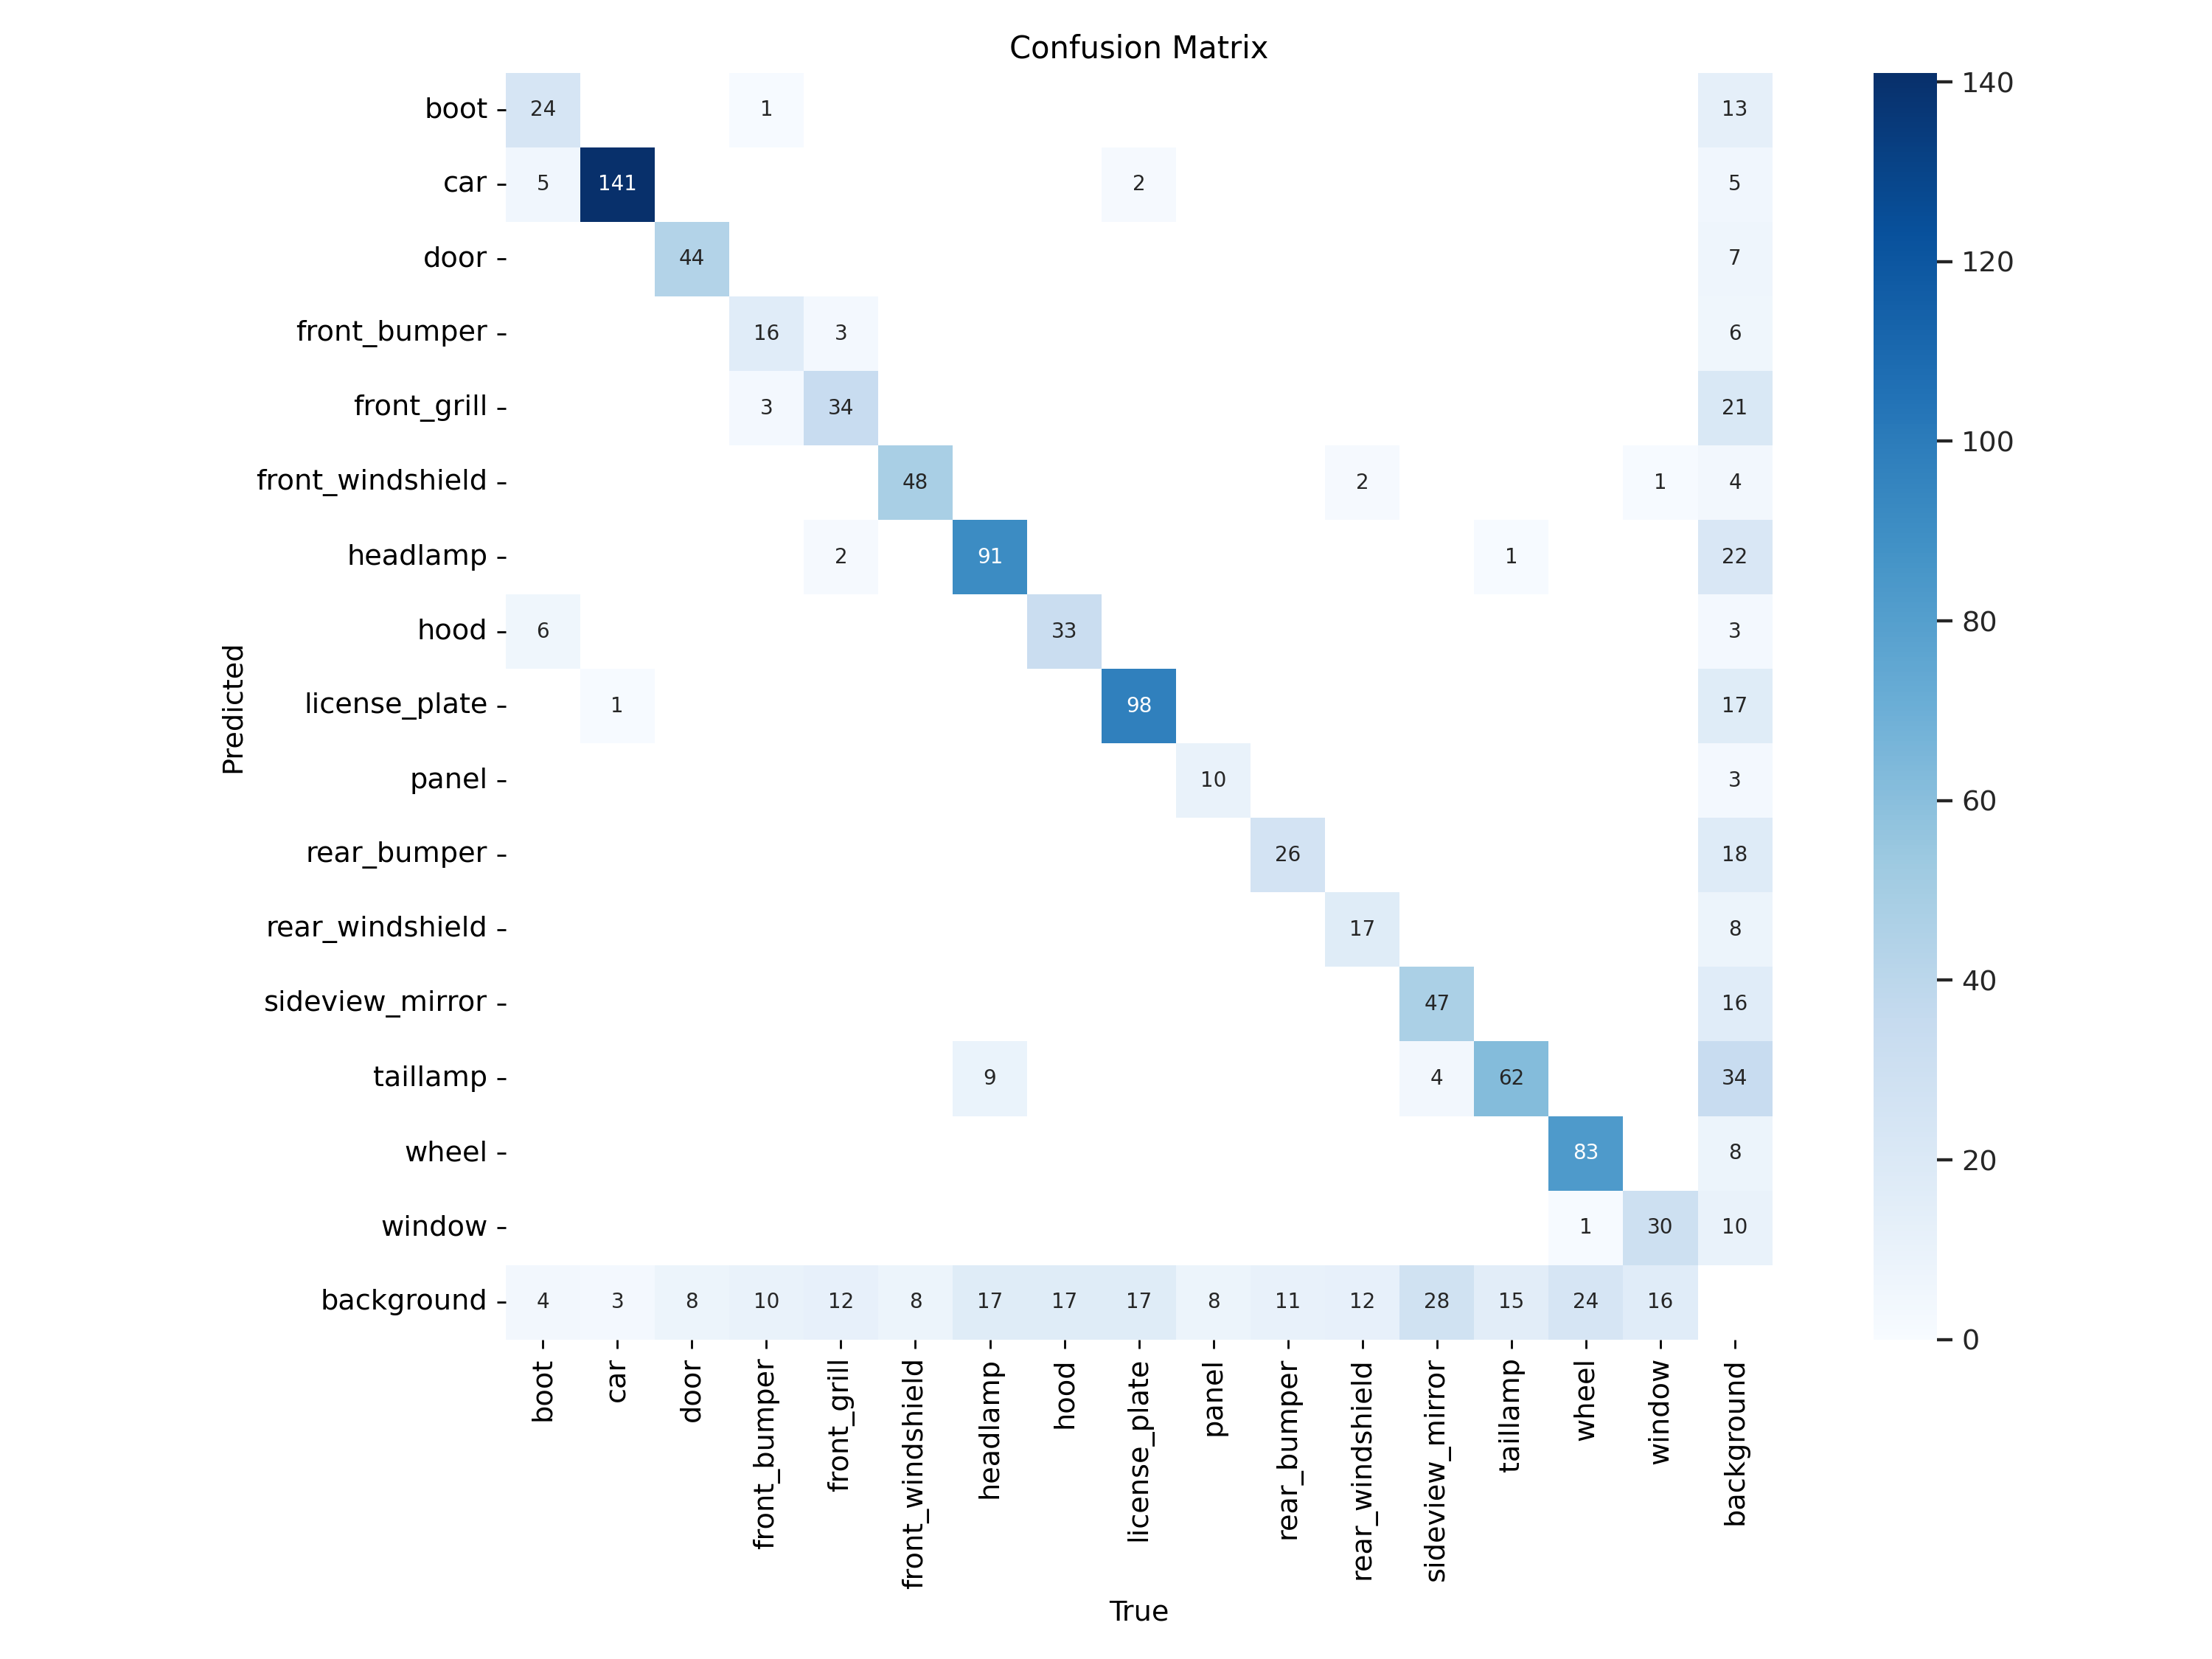

In [10]:
Image(filename='/content/drive/MyDrive/Colab_Notebooks/week2/car/runs/detect/train2/confusion_matrix.png', width=600)

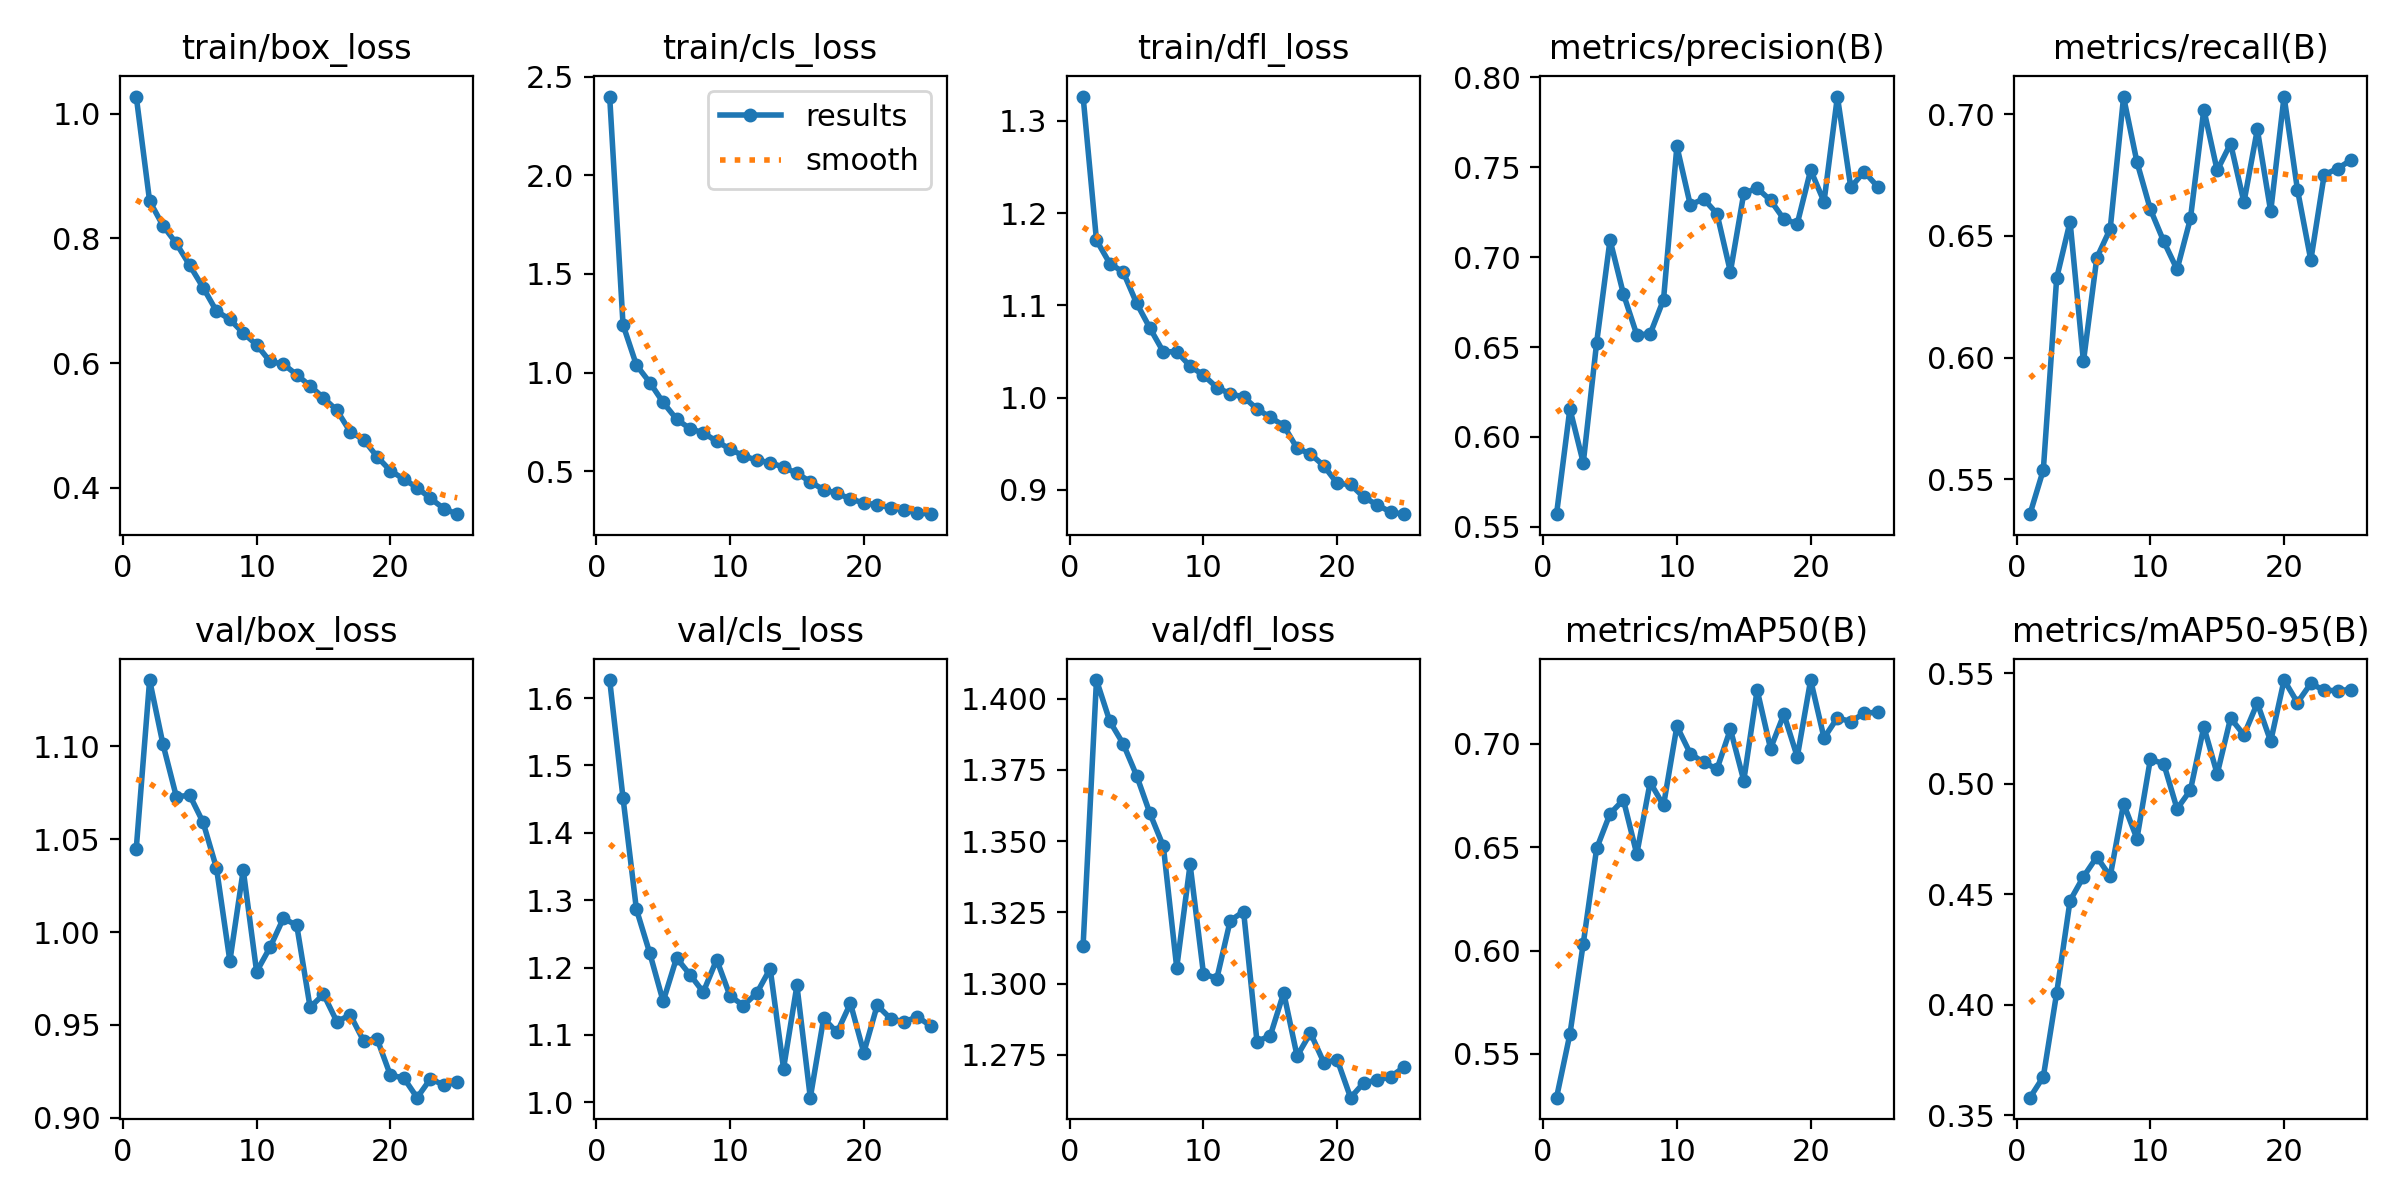

In [11]:
Image(filename='/content/drive/MyDrive/Colab_Notebooks/week2/car/runs/detect/train2/results.png', width=600)

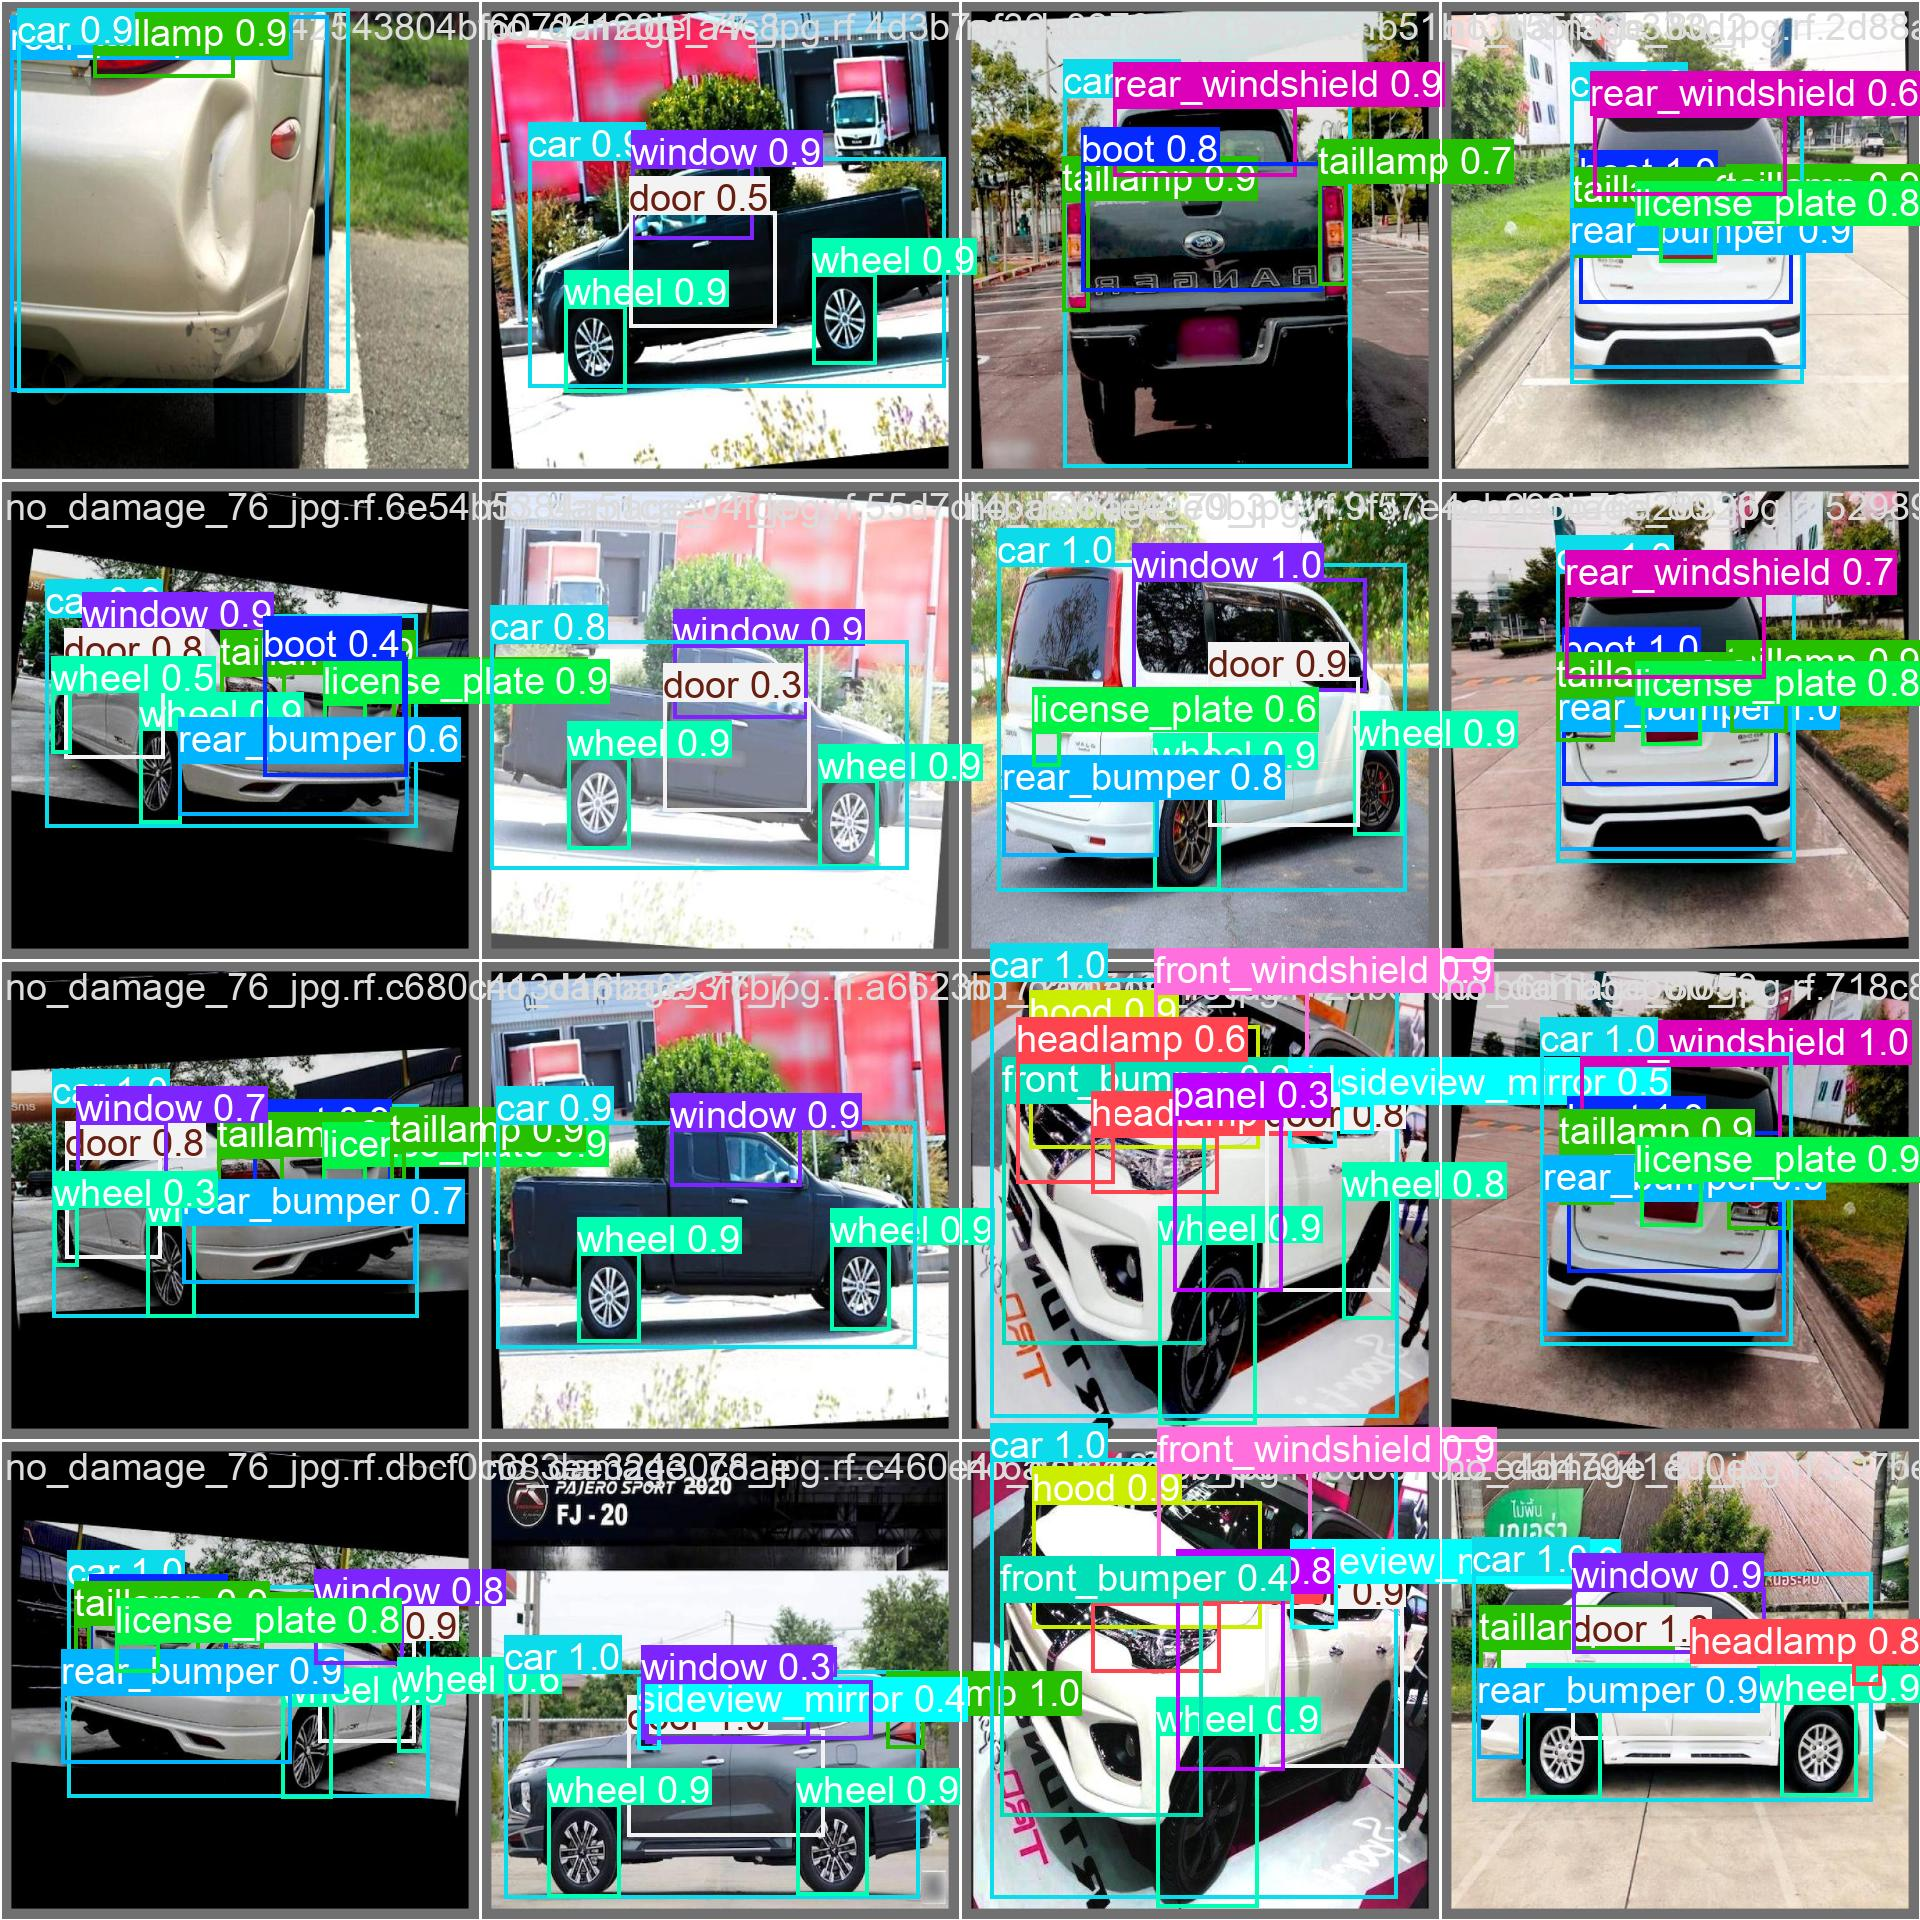

In [12]:
Image(filename='/content/drive/MyDrive/Colab_Notebooks/week2/car/runs/detect/train2/val_batch0_pred.jpg', width=600)

# **Validate Custom Model**

In [13]:
!yolo task=detect mode=val model=/content/drive/MyDrive/Colab_Notebooks/week2/car/runs/detect/train2/weights/best.pt data=/content/drive/MyDrive/Colab_Notebooks/week2/car/data.yaml

Ultralytics YOLOv8.2.55 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,131,776 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/drive/MyDrive/Colab_Notebooks/week2/car/valid/labels.cache... 160 images, 1 backgrounds, 0 corrupt: 100% 160/160 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 10/10 [00:09<00:00,  1.03it/s]
                   all        160       1055      0.748      0.708      0.731      0.547
                  boot         35         39       0.64      0.615       0.61      0.518
                   car        142        145      0.934      0.972      0.947      0.868
                  door         50         52       0.88      0.846      0.892      0.632
          front_bumper         30         30      0.631      0.513      0.599      0.485
           front_grill         49         51      0.575      0.647      0.565      0.461
      front_winds

# **Inference with Custom Model**

In [15]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/Colab_Notebooks/week2/car/runs/detect/train2/weights/best.pt conf=0.25 source=/content/drive/MyDrive/Colab_Notebooks/week2/car/test/images

Ultralytics YOLOv8.2.55 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,131,776 parameters, 0 gradients, 28.5 GFLOPs

image 1/22 /content/drive/MyDrive/Colab_Notebooks/week2/car/test/images/Cars212_png.rf.c31b66dbfb5e4d5bc2e10f4b331f03aa.jpg: 640x640 1 front_grill, 1 license_plate, 16.5ms
image 2/22 /content/drive/MyDrive/Colab_Notebooks/week2/car/test/images/Cars260_png.rf.358fc27422dbe6062fced88e7e5b59cc.jpg: 640x640 2 cars, 2 license_plates, 16.4ms
image 3/22 /content/drive/MyDrive/Colab_Notebooks/week2/car/test/images/Cars295_png.rf.5452c67121f3be7c3e37148a9cc4936d.jpg: 640x640 3 cars, 3 license_plates, 16.4ms
image 4/22 /content/drive/MyDrive/Colab_Notebooks/week2/car/test/images/Cars304_png.rf.f31408152fe09e73a74c2949a65058a0.jpg: 640x640 1 car, 1 front_grill, 1 license_plate, 1 wheel, 16.4ms
image 5/22 /content/drive/MyDrive/Colab_Notebooks/week2/car/test/images/Cars306_png.rf.dd001ad2f0e6c305bf5bd3d704eebd75.jpg: 640x640 1 ca

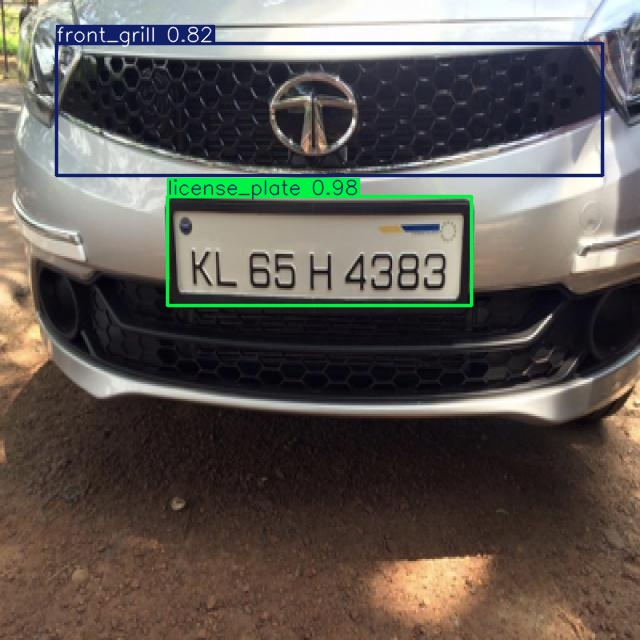

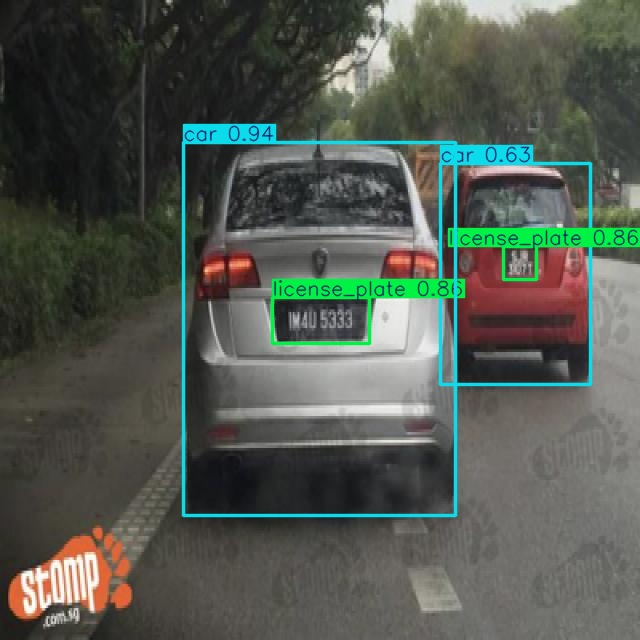

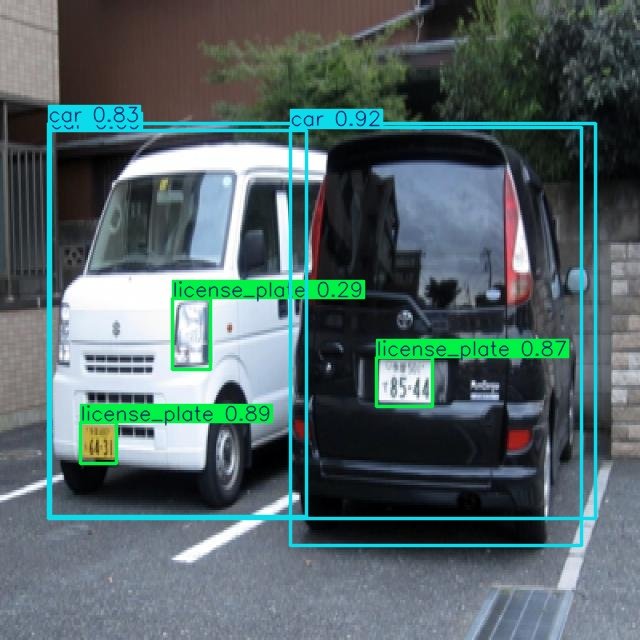

In [16]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")